# Text Analysis of Succession - 4x09 "Church and State" - Post Episode Discussion from Reddit

In [1]:
!pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 4.6 MB/s eta 0:00:00


In [2]:
!pip install --upgrade praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import praw
from nltk.sentiment import SentimentIntensityAnalyzer

In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## Connection to Reddit

In [5]:
''' # create a Reddit instance
reddit = praw.Reddit(client_id='your_client_id',
                     client_secret='your_client_secret',
                     username='your_username',
                     password='your_password',
                     user_agent='your_user_agent')
'''

import pickle

# Open the reddit variable with app values as a pickle file
with open('reddit.pickle', 'rb') as f:
    reddit = pickle.load(f)

In [6]:
import re

# example Reddit post URL
url = 'https://www.reddit.com/r/SuccessionTV/comments/13odf53/succession_4x09_church_and_state_post_episode/'

# extract the subreddit name and post ID from the URL
match = re.search(r'/r/(\w+)/comments/(\w+)/', url)
subreddit_name = match.group(1)
post_id = match.group(2)

print(subreddit_name, post_id)

SuccessionTV 13odf53


## Sentiment Analysis

We'll be doing an analysis of 499 posts.

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [8]:
import warnings
warnings.filterwarnings("ignore", message=".*Using an asynchronous PRAW instance.*")


In [9]:
# get the subreddit and post using PRAW
subreddit = reddit.subreddit(subreddit_name)
post = reddit.submission(id=post_id)

# analyze the sentiment of each comment in the post
for comment in post.comments.list():
    if isinstance(comment, praw.models.MoreComments):
        continue
    sentiment = sia.polarity_scores(comment.body)
    print(f"Comment: {comment.body}")
    print(f"Sentiment: {sentiment}\n")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: 5 mil?
Good deal.
Sentiment: {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

Comment: Logan would have loved Tom missing his funeral to keep ATN running
Sentiment: {'neg': 0.267, 'neu': 0.511, 'pos': 0.222, 'compound': 0.0516}

Comment: Someone here has to bring up Connor even if this wasn’t a focus ep for him. I loved the low key characterization that he’s the only one who his dad texted about his nutty fucking tomb, feels like it shows a funny side of both of them.  Really feels like it highlights what one could imagine could be the one positive side of their relationship: Logan texting Connor every once in a while about something that seems like weird shit he would be into
Sentiment: {'neg': 0.076, 'neu': 0.731, 'pos': 0.193, 'compound': 0.906}

Comment: Caroline’s face when she didn’t get credit for having 3 kids absolutely sent me to the moon
Sentiment: {'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'compound': 0.3818}

Comment: Kendall planning to fight Rava for 

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer

# initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# analyze the sentiment of each comment in the post
compound_scores = []
for comment in post.comments.list():
    if isinstance(comment, praw.models.MoreComments):
        continue
    sentiment = sia.polarity_scores(comment.body)
    compound_scores.append(sentiment['compound'])

# calculate the average compound score and print the results
average_score = sum(compound_scores) / len(compound_scores)
num_comments = len(compound_scores)
print(f"Analyzed {num_comments} comments with an average compound score of {average_score:.2f}")


Analyzed 500 comments with an average compound score of 0.03


A compound score of 0.03 is positive but very close to neutral, which means that the analyzed comments may contain a mix of positive and negative sentiment, but overall the sentiment leans slightly towards the positive side. 


## Wordcloud

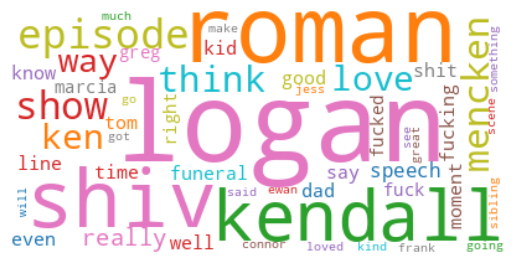

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# extract the comments from the post and remove any MoreComments objects
comments = [comment.body for comment in post.comments.list() if not isinstance(comment, praw.models.MoreComments)]

# add custom stopwords
stop_words = set(STOPWORDS)
stop_words.update(["s", "t", "one", "get", "would", "like", "re" "ve", "m"])

# remove stopwords and convert text to lowercase
clean_text = " ".join([word.lower() for word in " ".join(comments).split() if word.lower() not in stop_words])

# generate the wordcloud
color_map = plt.get_cmap('tab10') # create a custom color map
wordcloud = WordCloud(stopwords=stop_words, max_words=50, background_color="white", colormap=color_map).generate(clean_text)

# display the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## LSA

In [12]:
import numpy as np
import pandas as pd

# create a pandas DataFrame with a single column called "comments"
df = pd.DataFrame(comments, columns=["comments"])

In [13]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# stopwords in english
stop_words_en = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
def clean_text(headline):
  le = WordNetLemmatizer()
  word_tokens = word_tokenize(headline)
  tokens = [le.lemmatize(x) for x in word_tokens 
            if x not in stop_words_en and len(x) > 3]
  clean_text = " ".join(tokens)
  return clean_text

In [15]:
df['clean_comments'] = df['comments'].apply(clean_text)
df['clean_comments']

# aplicamos stemming
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')
df['stemmed_comments'] = [stemmer.stem(word) for word in df['clean_comments']]
df['stemmed_comments']

0                                              good deal
1             logan would loved missing funeral keep run
2      someone bring connor even focus loved characte...
3          caroline face credit kid absolutely sent moon
4      kendall planning fight rava custody purely spi...
                             ...                        
495    pretend none often whiniest butthurt self-vict...
496                     estimation roman fucking plummet
497    mencken power directly control could certainly...
498    came shiv touched terrible logan could woman w...
499             loved gleeful look pride admiration said
Name: stemmed_comments, Length: 500, dtype: object

In [16]:
df

,comments,clean_comments,stemmed_comments
0,5 mil?\nGood deal.,Good deal,good deal
1,Logan would have loved Tom missing his funeral...,Logan would loved missing funeral keep running,logan would loved missing funeral keep run
2,Someone here has to bring up Connor even if th...,Someone bring Connor even focus loved characte...,someone bring connor even focus loved characte...
3,Caroline’s face when she didn’t get credit for...,Caroline face credit kid absolutely sent moon,caroline face credit kid absolutely sent moon
4,"Kendall planning to fight Rava for custody, pu...",Kendall planning fight Rava custody purely spi...,kendall planning fight rava custody purely spi...
...,...,...,...
495,"And pretend they have none, when they're often...",pretend none often whiniest butthurt self-vict...,pretend none often whiniest butthurt self-vict...
496,His estimation of Roman Roy as a man just fuck...,estimation Roman fucking plummeted,estimation roman fucking plummet
497,Mencken doesn’t have the power to directly con...,Mencken power directly control could certainly...,mencken power directly control could certainly...
498,I came to say this too. Shiv touched on how te...,came Shiv touched terrible Logan could woman w...,came shiv touched terrible logan could woman w...


In [17]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

svd_model = TruncatedSVD(n_components = 5, random_state = 42)
tfvec = TfidfVectorizer()
tf_p = tfvec.fit_transform(df.stemmed_comments)
svd_model.fit(tf_p)
terms = tfvec.get_feature_names_out()

for i, component in enumerate(svd_model.components_):
  terminos = zip(terms, component)
  top_terminos = sorted(terminos, key = lambda x: x[1], reverse = True)[:7]
  lista_temas = list(dict(top_terminos).keys())
  print("Topic "+str(i+1)+": ", lista_temas)

Topic 1:  ['logan', 'roman', 'shiv', 'like', 'kendall', 'would', 'mencken']
Topic 2:  ['logan', 'loved', 'really', 'typ', 'woman', 'dead', 'connor']
Topic 3:  ['woof', 'hugo', 'love', 'good', 'show', 'mondale', 'they']
Topic 4:  ['love', 'good', 'they', 'know', 'need', 'also', 'roman']
Topic 5:  ['good', 'shiv', 'said', 'greg', 'would', 'they', 'mattson']
